In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models.ICA_EM import CausalVarEM
import tqdm
import pandas as pd
from models.dgp import *
from sklearn.metrics import mean_squared_error as mse

In [ ]:
n = 10000
J = 6
I = 5
def sim(mode, B, iter):
    B = B
    df = pd.DataFrame(data = np.zeros((B, 7)), columns=["true_treatment", "first", "second", "third", "fourth", "fifth", "sixth"])
    # fifth should correspond to the true treatment
    data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
    for i in tqdm.tqdm(range(B)):
        data.generate_data(n,I, J, random_state=i,init_range = [1,3])
        est = CausalVarEM(update_sigma=False, true_A=None,max_iter = iter, random_seed= i, mode=mode, init_range = [-3,-1])
        est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
        df.iloc[i, 0] = data.treatment_effect
        df.iloc[i, 1:] =  est.A[-1,:]
    return df


def metrics(df):
    # mse for all columns
    true_treatment = df["true_treatment"]
    for i in range(1,6):
        mse_column = mse(true_treatment, df.iloc[:,i])
        print("MSE for column " + str(i) + " is " + str(mse_column))
        print("Standard deviation for column " + str(i) + " is " + str(np.std(df.iloc[:,i])))
    

def vioplot(data):
    df = data.copy().drop("sixth", axis = 1)
    df["id"] = range(len(df))
    df_long = df.melt(id_vars = ["id"])
    plt.figure(figsize=(12,5))
    sns.violinplot(data = df_long,x = "variable",  y = "value" , alpha = 0.5)
    plt.xlabel("Column")
    plt.ylabel("Treatment effect")
    plt.title("Violin plot of estimated treatment effects")
    plt.show()


In [4]:
df = sim("lower_triangular", 100, 100)
#df.to_csv("results/CausalVarEM_different_init_range.csv", index=False)

100%|██████████| 100/100 [37:13<00:00, 22.33s/it]


In [13]:
df = pd.read_csv("results/CausalVarEM_different_init_range.csv")
metrics(df)

MSE for column 1 is 24.926297805917866
Standard deviation for column 1 is 0.6808106793214481
MSE for column 2 is 47.77288507396682
Standard deviation for column 2 is 2.484127728579339
MSE for column 3 is 29.80339678721069
Standard deviation for column 3 is 0.908210876426147
MSE for column 4 is 22.162643192791915
Standard deviation for column 4 is 1.021922104231512
MSE for column 5 is 0.30812235437074104
Standard deviation for column 5 is 0.8341012145215081


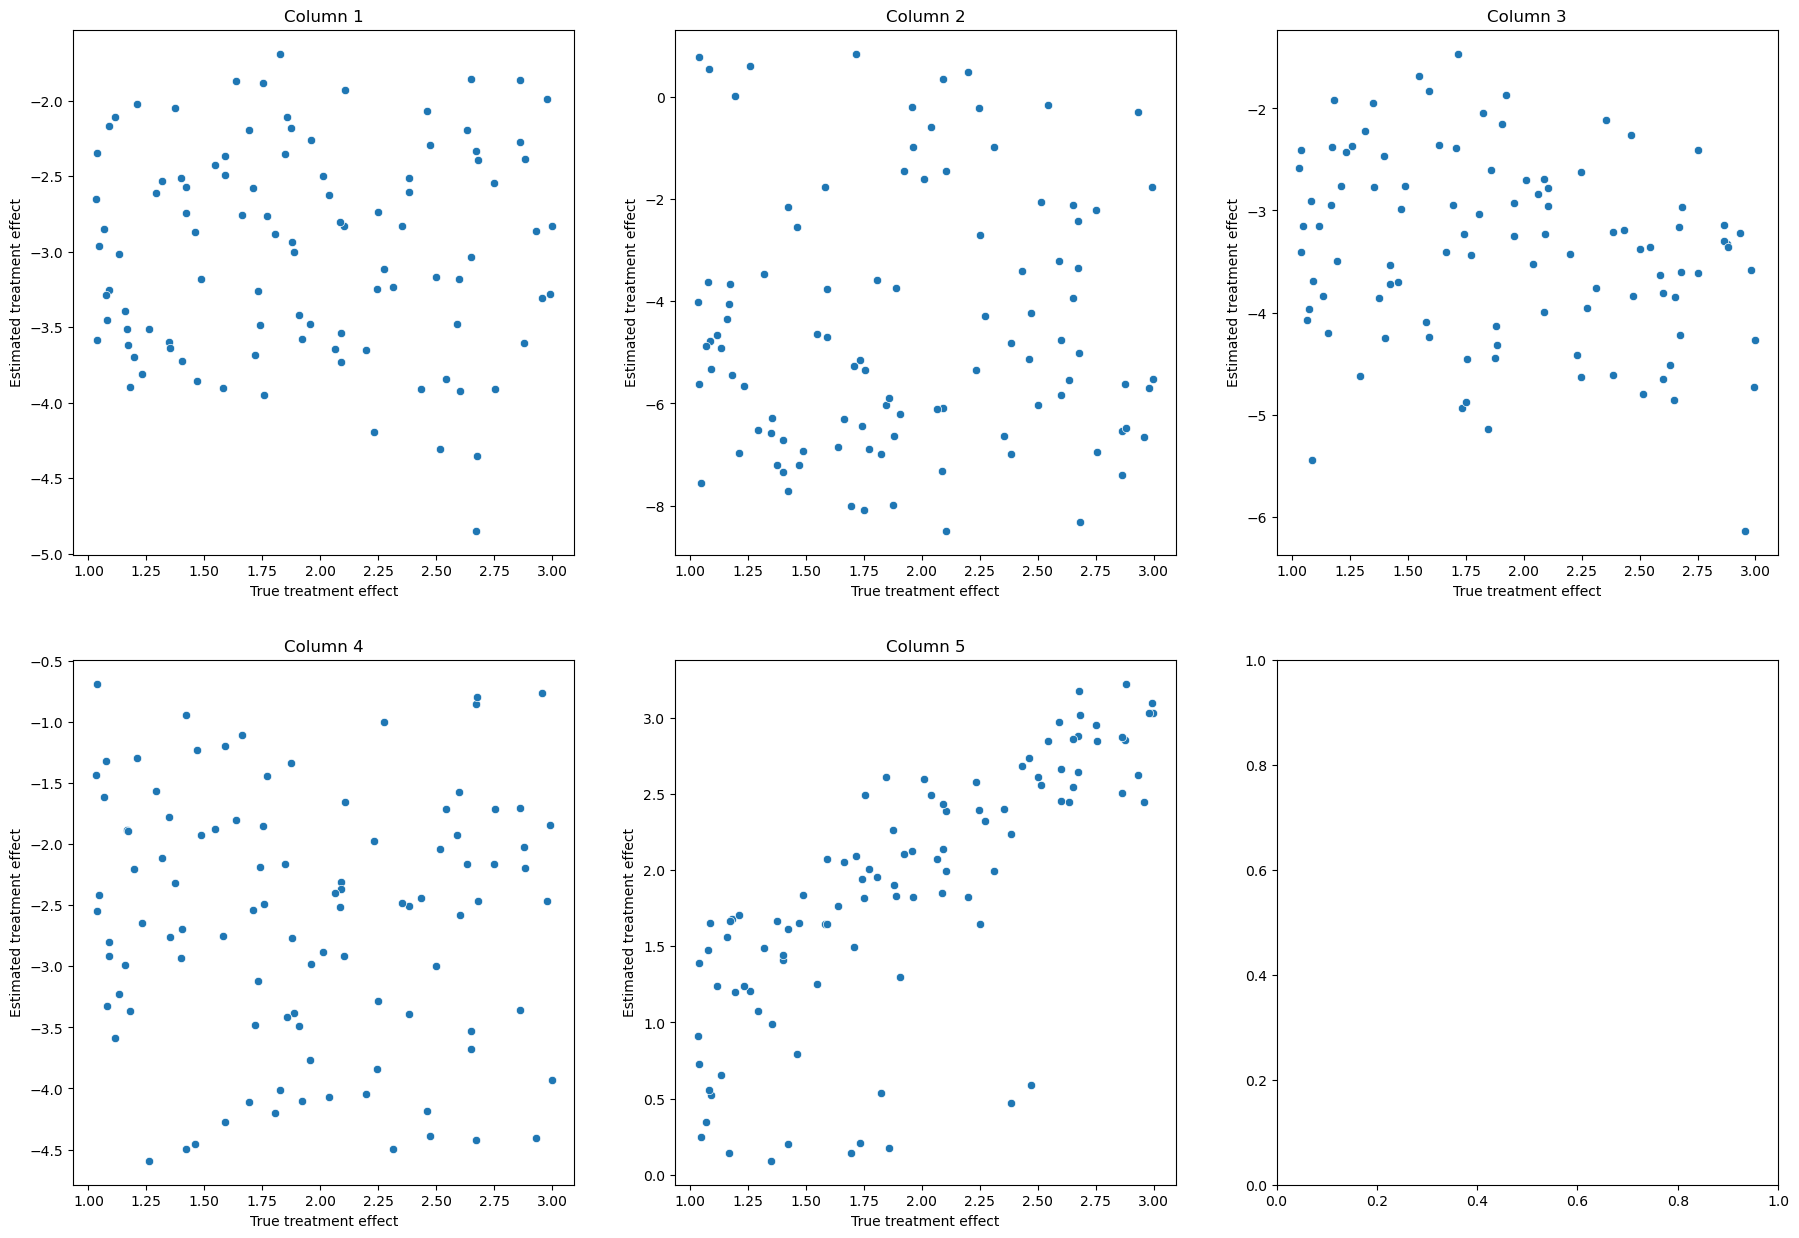

In [9]:
df = pd.read_csv("results/CausalVarEM_different_init_range.csv")

fig, ax = plt.subplots(2,3, figsize = (22,15))
# plot the true treatment effect vs all columns
for i in range(1,6):
    sns.scatterplot(x = "true_treatment", y = df.columns[i], data = df, ax = ax[int((i-1)/3), (i-1)%3])
    ax[int((i-1)/3), (i-1)%3].set_title("Column " + str(i))
    ax[int((i-1)/3), (i-1)%3].set_xlabel("True treatment effect")
    ax[int((i-1)/3), (i-1)%3].set_ylabel("Estimated treatment effect")

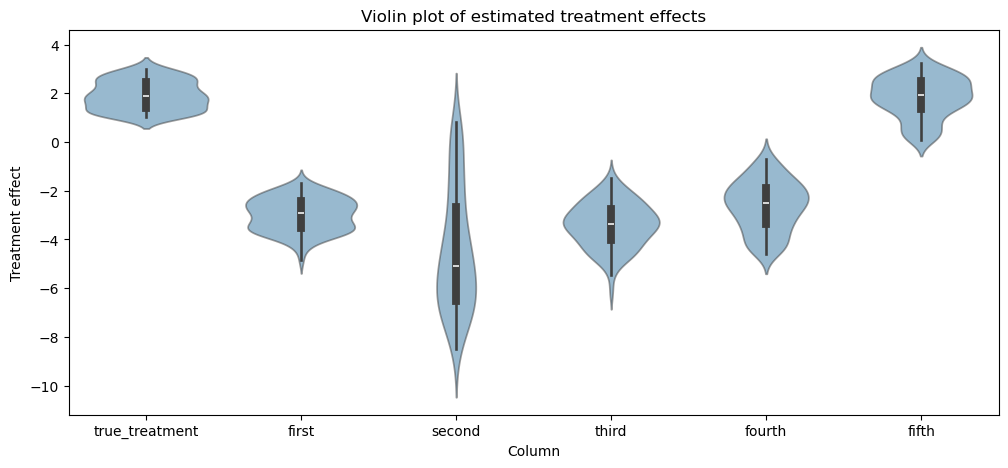

In [10]:
vioplot(df)
